<a href="https://colab.research.google.com/github/paddy3696/CNN_Pytorch/blob/main/CNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_gpu = torch.cuda.is_available()

if not train_gpu:
    print('CUDA is not available. Training on CPU')
else:
    print('CUDA is available! Training on GPU')

CUDA is available! Training on GPU


In [ ]:
data_dir = '/content/drive/MyDrive/MSIITM/Courses/DL/assignment2/inaturalist_12K'

# transforms.Resize(224)
train_transforms = transforms.Compose([transforms.RandomRotation(30), 
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
                                
test_transforms = transforms.Compose([transforms.Resize(255),transforms.CenterCrop(224),transforms.ToTensor()])
                                      
train_data = datasets.ImageFolder(data_dir + '/train',transform=train_transforms)                                       

test_data = datasets.ImageFolder(data_dir + '/val', transform=test_transforms)

In [ ]:
# https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split
# https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html#random_split
# https://stackoverflow.com/questions/50544730/how-do-i-split-a-custom-dataset-into-training-and-test-datasets/50544887#50544887

batch_size = 16
validation_split = .1
shuffle_dataset = True
random_seed= 9

dataset_size = len(train_data)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [ ]:
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

9999
2000


In [ ]:
# https://github.com/udacity/DL_PyTorch/blob/master/helper.py#L42
def imshow(image, ax=None, title=None, normalize=True):
  """Imshow for Tensor."""
  if ax is None:
      fig, ax = plt.subplots()
  image = image.numpy().transpose((1, 2, 0))

  if normalize:
      mean = np.array([0.485, 0.456, 0.406])
      std = np.array([0.229, 0.224, 0.225])
      image = std * image + mean
      image = np.clip(image, 0, 1)

  ax.imshow(image)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.set_xticklabels('')
  ax.set_yticklabels('')

  return ax

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


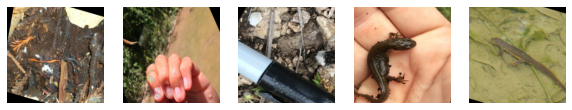

In [ ]:
data_iter = iter(trainloader)

imgs, labels = next(data_iter)
fig, axs = plt.subplots(figsize=(10,4), ncols = 5)
for i in range(5):
    ax = axs[i]
    print(imgs.shape)
    imshow(imgs[i],ax=ax, normalize = False)

In [ ]:
class MyNN(nn.Module):
  def __init__(self):
    super(MyNN,self).__init__()

    self.conv_1 = nn.Conv2d(3,8,kernel_size=3,padding=1)
    self.conv_2 = nn.Conv2d(8,16,kernel_size=3,padding=1)
    self.conv_3 = nn.Conv2d(16,32,kernel_size=3,padding=1)
    self.conv_4 = nn.Conv2d(32,64,kernel_size=3,padding=1)
    self.conv_5 = nn.Conv2d(64,96,kernel_size=3,padding=1)

    self.pool = nn.MaxPool2d(2,2)
    
    self.fc1 = nn.Linear(96*7*7,500)

    self.fc2 = nn.Linear(500,10)

    self.dropout = nn.Dropout(0.25)

  def forward(self,x):
    x = self.pool(F.relu(self.conv_1(x)))
    x = self.pool(F.relu(self.conv_2(x)))
    x = self.pool(F.relu(self.conv_3(x)))
    x = self.pool(F.relu(self.conv_4(x)))
    x = self.pool(F.relu(self.conv_5(x)))

    x = x.view(-1,96*7*7)

    x = self.dropout(x)

    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)

    #return F.log_softmax(x,dim= 1)
    return x